<a href="https://colab.research.google.com/github/alibekk93/IDP_analysis/blob/main/OMA_search/OMA_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# copy repo to get available datafiles

!git clone https://github.com/alibekk93/IDP_analysis.git

fatal: destination path 'IDP_analysis' already exists and is not an empty directory.


In [2]:
!pip install omadb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from omadb import Client
import urllib.request
import json
from tqdm import tqdm

In [4]:
oma = pd.read_csv('/content/IDP_analysis/OMA_search/OMA_allSpecies.csv')
tempura = pd.read_excel('/content/IDP_analysis/OMA_search/200617_TEMPURA.xlsx')

In [5]:
oma.head(3)

,Code,Scientific Name,Common Name,Last Update,# of Sequences,NCBI TaxonId,D.
0,TREPP,Tremblaya princeps (strain PCIT),NaN,2013-Dec-17,120,891398,B
1,HODCD,Hodgkinia cicadicola (strain Dsem),NaN,2013-May-28,169,573234,B
2,CARRP,Carsonella ruddii (strain PV),NaN,2007-May-03,182,387662,B


In [6]:
tempura.head(3)

,genus_and_species,taxonomy_id,strain,superkingdom,phylum,class,order,family,genus,assembly_or_accession,...,Genome_size,16S_accssion,16S_GC,Tmin,Topt_ave,Topt_low,Topt_high,Tmax,Tmax_Tmin,Expression
0,Methanopyrus kandleri,2320,116,Archaea,Euryarchaeota,Methanopyri,Methanopyrales,Methanopyraceae,Methanopyrus,NaN,...,NaN,AB301476,67.7,85.0,100.0,NaN,NaN,122.0,37.0,NaN
1,Geogemma barossii,1927912,121,Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales,Pyrodictiaceae,Geogemma,NaN,...,NaN,NaN,NaN,85.0,106.0,NaN,NaN,121.0,36.0,NaN
2,Pyrolobus fumarii,54252,1A,Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales,Pyrodictiaceae,Pyrolobus,GCA_000223395.1,...,1.8,X99555,68.4,90.0,106.0,NaN,NaN,113.0,23.0,NaN


In [7]:
oma['genus_and_species'] = [' '.join(sn.split(' ')[:2]) for sn in oma['Scientific Name']]

In [8]:
oma_tempura = pd.merge(left=oma, right=tempura, on='genus_and_species', how='inner')

In [9]:
oma_tempura[['Code', 'genus_and_species', 'Tmin', 'Topt_ave', 'Tmax']]

,Code,genus_and_species,Tmin,Topt_ave,Tmax
0,MYCMO,Mycoplasma mobile,17.0,30.0,30.0
1,UREU1,Ureaplasma urealyticum,20.0,32.5,40.0
2,METFV,Methanothermus fervidus,65.0,83.0,97.0
3,DEHMB,Dehalococcoides mccartyi,15.0,27.5,35.0
4,DEHMG,Dehalococcoides mccartyi,15.0,27.5,35.0
...,...,...,...,...,...
415,ACTM4,Actinoplanes missouriensis,15.0,28.0,32.0
416,ACAM1,Acaryochloris marina,20.0,29.0,35.0
417,STIAD,Stigmatella aurantiaca,18.0,30.0,37.0
418,CATAD,Catenulispora acidiphila,11.0,25.0,37.0


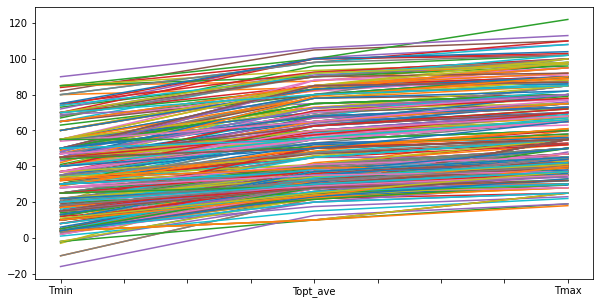

In [10]:
fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(oma_tempura)):
  oma_tempura.iloc[i][['Tmin', 'Topt_ave', 'Tmax']].plot(kind='line')

In [11]:
oma_tempura_bact = oma_tempura[oma_tempura.superkingdom=='Bacteria']

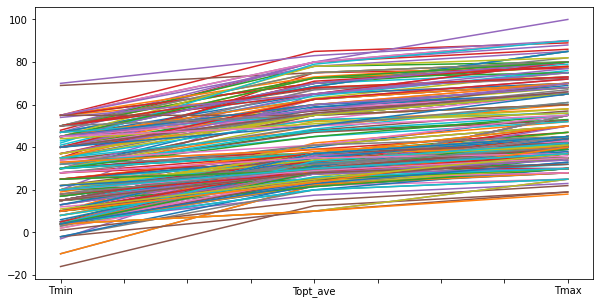

In [12]:
fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(oma_tempura_bact)):
  oma_tempura_bact.iloc[i][['Tmin', 'Topt_ave', 'Tmax']].plot(kind='line')

48


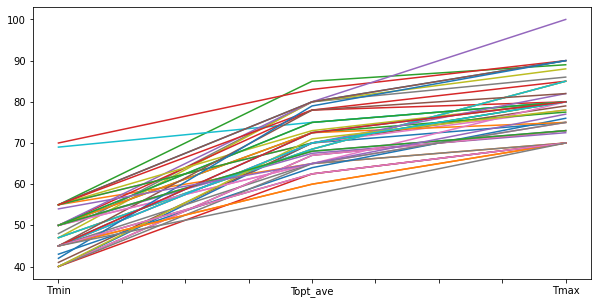

In [13]:
oma_tempura_bact_t = oma_tempura_bact[(oma_tempura_bact.Tmin >= 40) & (oma_tempura_bact.Tmax >= 70)]

fig, ax = plt.subplots(figsize=(10,5))

print(len(oma_tempura_bact_t))

for i in range(len(oma_tempura_bact_t)):
  oma_tempura_bact_t.iloc[i][['Tmin', 'Topt_ave', 'Tmax']].plot(kind='line')

8


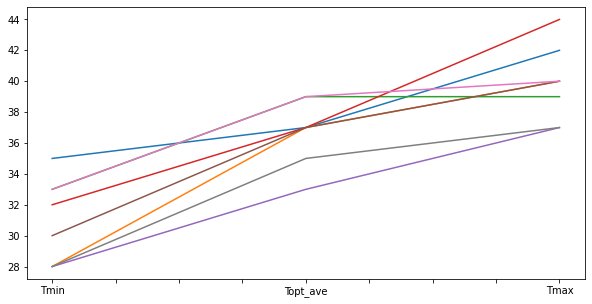

In [14]:
oma_tempura_bact_m = oma_tempura_bact[(oma_tempura_bact.Tmin > 25) & (oma_tempura_bact.Tmax < 45)]

fig, ax = plt.subplots(figsize=(10,5))

print(len(oma_tempura_bact_m))

for i in range(len(oma_tempura_bact_m)):
  oma_tempura_bact_m.iloc[i][['Tmin', 'Topt_ave', 'Tmax']].plot(kind='line')

15


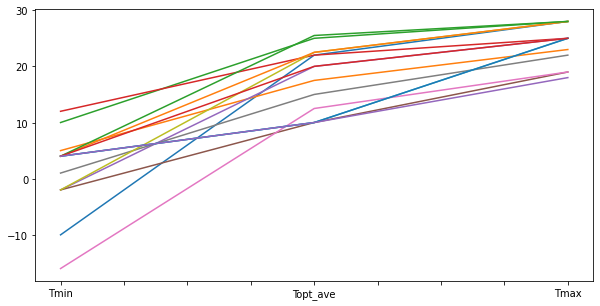

In [15]:
oma_tempura_bact_p = oma_tempura_bact[oma_tempura_bact.Tmax < 30]

fig, ax = plt.subplots(figsize=(10,5))

print(len(oma_tempura_bact_p))

for i in range(len(oma_tempura_bact_p)):
  oma_tempura_bact_p.iloc[i][['Tmin', 'Topt_ave', 'Tmax']].plot(kind='line')

In [16]:
oma_tempura_bact_t

,Code,Scientific Name,Common Name,Last Update,# of Sequences,NCBI TaxonId,D.,genus_and_species,taxonomy_id,strain,...,Genome_size,16S_accssion,16S_GC,Tmin,Topt_ave,Topt_low,Topt_high,Tmax,Tmax_Tmin,Expression
19,DESTD,Desulfurobacterium thermolithotrophum (strain...,NaN,2014-Jan-25,1495,868864,B,Desulfurobacterium thermolithotrophum,64160,BSAT,...,1.5,AJ001049,61.2,40.0,70.0,NaN,NaN,75.0,35.0,NaN
27,CALEA,Caldisericum exile (strain DSM 21853 / NBRC 1...,NaN,2014-May-21,1564,511051,B,Caldisericum exile,693075,AZM16c01,...,1.6,AB428365,55.2,55.0,65.0,NaN,NaN,70.0,15.0,NaN
31,THEAH,Thermocrinis albus (strain DSM 14484 / JCM 11...,NaN,2012-Jan-02,1592,638303,B,Thermocrinis albus,136094,HI 11/12,...,1.5,AJ278895,63.0,55.0,85.0,NaN,NaN,89.0,34.0,NaN
32,THEGP,Thermodesulfobacterium geofontis (strain OPF15),NaN,2014-Jun-18,1593,795359,B,Thermodesulfobacterium geofontis,1295609,OPF15,...,1.6,NR_118457,61.9,70.0,83.0,NaN,NaN,90.0,20.0,NaN
45,SULAA,Sulfurihydrogenibium azorense (strain Az-Fu1 ...,NaN,2009-Nov-01,1707,204536,B,Sulfurihydrogenibium azorense,309806,Az-Fu1,...,1.6,AF528192,57.4,50.0,68.0,NaN,NaN,73.0,23.0,NaN
52,FERNB,Fervidobacterium nodosum (strain ATCC 35602 /...,NaN,2008-Feb-26,1725,381764,B,Fervidobacterium nodosum,2424,Rt17â€B,...,1.9,M59177,58.7,41.0,70.0,NaN,NaN,79.0,38.0,NaN
58,THET7,Thermosulfidibacter takaii (strain DSM 17441 ...,NaN,2019-Aug-14,1757,1298851,B,Thermosulfidibacter takaii,412593,ABI70S6,...,1.8,AB282756,62.1,55.0,70.0,NaN,NaN,78.0,23.0,NaN
59,THENR,Thermotoga naphthophila (strain ATCC BAA-489 ...,NaN,2010-May-24,1765,590168,B,Thermotoga naphthophila,93930,RKU-10,...,1.8,AB027017,63.9,48.0,80.0,NaN,NaN,86.0,38.0,NaN
61,THEP1,Thermotoga petrophila (strain RKU-1 / ATCC BA...,NaN,2008-Feb-07,1783,390874,B,Thermotoga petrophila,93929,RKU-1,...,1.8,AB027016,64.4,47.0,80.0,NaN,NaN,88.0,41.0,NaN
64,THEA1,Thermovibrio ammonificans (strain DSM 15698 /...,NaN,2012-Nov-29,1812,648996,B,Thermovibrio ammonificans,228745,HB-1,...,1.8,AY263403,63.5,69.0,75.0,NaN,NaN,80.0,11.0,NaN


In [17]:
c = Client()

In [18]:
for species in oma_tempura_bact_t.Code:
  if species[:4] != 'THET':
    n = len(list(c.pairwise('THET8', species, rel_type='1:1', progress=False)))
    if n > 600:
      print(species, n, sep=':')

THEM3:605
MARHT:1448
THEM7:694
DEFDS:621
CARHZ:639
THERP:702
RHOM4:724
ALIAD:686
ALIAT:673
GEOTN:723


In [19]:
for species in oma_tempura_bact_m.Code:
  if species[:4] != 'THET':
    n = len(list(c.pairwise('THET8', species, rel_type='1:1', progress=False)))
    if n > 500:
      print(species, n, sep=':')

ALKOO:513
SEGRD:509
CLOLD:524
NITMO:612
MYCGO:566


In [20]:
for species in oma_tempura_bact_p.Code:
  if species[:4] != 'THET':
    n = len(list(c.pairwise('THET8', species, rel_type='1:1', progress=False)))
    if n > 500:
      print(species, n, sep=':')

TOLAT:549
DESPS:512
ALISL:516
SHEHH:559
SHESH:565
GRATM:589
GRAMM:618
POLNA:608
PHOPR:526


In [21]:
new_oma = ['THEM7', 'MARHT', 'DEFDS', 'CARHZ', 'THERP', 'RHOM4', 'ALIAD', 'GEOTN',
           'ECOLI', 'BACSU', 'NITMO', 'MYCGO',
           'GRAMM', 'POLNA', 'SHESH']
oma_urls = ['https://omabrowser.org/cgi-bin/gateway.pl?f=PairwiseOrthologs&p1=THET8&p2={}&p3=UniProt'.format(species) for species in new_oma]

In [22]:
def try_retrieve_url(url: str, filename: str):
  """A simple try / except pattern for urllib.request
  """

  try:
    return urllib.request.urlretrieve(url, filename)
  except:
    return np.nan

In [23]:
for url, species in zip(oma_urls, new_oma):
  try_retrieve_url(url, species+'.tsv')

In [24]:
oma_tempura_bact[oma_tempura_bact.Code.isin(new_oma)]

,Code,Scientific Name,Common Name,Last Update,# of Sequences,NCBI TaxonId,D.,genus_and_species,taxonomy_id,strain,...,Genome_size,16S_accssion,16S_GC,Tmin,Topt_ave,Topt_low,Topt_high,Tmax,Tmax_Tmin,Expression
112,MARHT,Marinithermus hydrothermalis (strain DSM 1488...,NaN,2013-Dec-17,2194,869210,B,Marinithermus hydrothermalis,186192,T1,...,2.3,AB079382,64.0,50.0,67.5,NaN,NaN,72.5,22.5,NaN
132,THEM7,Thermaerobacter marianensis (strain ATCC 7008...,NaN,2012-Jan-19,2324,644966,B,Thermaerobacter marianensis,73919,7p75a,...,2.8,AB011495,64.0,50.0,75.0,74.0,76.0,80.0,30.0,NaN
136,DEFDS,Deferribacter desulfuricans (strain DSM 14783...,NaN,2010-Sep-29,2353,639282,B,Deferribacter desulfuricans,197162,BMA,...,2.5,AB086060,59.5,40.0,62.5,60.0,65.0,70.0,30.0,NaN
173,CARHZ,Carboxydothermus hydrogenoformans (strain ATC...,NaN,2014-Mar-24,2615,246194,B,Carboxydothermus hydrogenoformans,129958,Z-2901,...,2.4,NR_074395,58.8,40.0,71.0,70.0,72.0,78.0,38.0,NaN
214,THERP,Thermomicrobium roseum (strain ATCC 27502 / D...,NaN,2009-May-15,2858,309801,B,Thermomicrobium roseum,500,ATCC 27502,...,2.9,M34115,65.5,45.0,72.5,70.0,75.0,80.0,35.0,NaN
216,RHOM4,Rhodothermus marinus (strain ATCC 43812 / DSM...,NaN,2015-Mar-08,2861,518766,B,Rhodothermus marinus,29549,DSM 4252,...,3.4,NR_029282,61.9,54.0,65.0,NaN,NaN,77.0,23.0,NaN
234,ALIAD,Alicyclobacillus acidocaldarius subsp. acidoc...,NaN,2010-Jan-18,3059,521098,B,Alicyclobacillus acidocaldarius,405212,104-1A,...,3.2,AB042056,59.9,45.0,62.5,60.0,65.0,70.0,25.0,NaN
263,GEOTN,Geobacillus thermodenitrificans (strain NG80-2),NaN,2007-Jul-08,3419,420246,B,Geobacillus thermodenitrificans,33940,DSM 465,...,3.6,Z26928,58.4,45.0,57.5,50.0,65.0,70.0,25.0,NaN
325,BACSU,Bacillus subtilis (strain 168),NaN,2014-Mar-24,4254,224308,B,Bacillus subtilis,1423,ATCC 6051,...,NaN,AB042061,55.1,5.0,29.0,28.0,30.0,55.0,50.0,NaN
358,SHESH,Shewanella sediminis (strain HAW-EB3),NaN,2008-Mar-05,4493,425104,B,Shewanella sediminis,271097,HAW-EB3,...,5.5,AY579750,53.3,4.0,10.0,NaN,NaN,25.0,21.0,NaN


In [25]:
def read_oma(species):
  # load the raw dataframe
  OMA = pd.read_csv('/content/{}.tsv'.format(species), sep='\t', header=None)
  OMA.columns = ['THET8', species, 'type', 'OMA_group']

  # remove extra symbols
  OMA.THET8 = OMA.THET8.str.replace('_THET8', '')
  OMA[species] = OMA[species].str.replace('_', '')
  OMA[species] = OMA[species].str.replace(species, '')

  # keep only 1:1 type
  OMA = OMA[OMA['type'] == '1:1']

  # drop OMA_group column
  OMA.drop('OMA_group', axis='columns', inplace=True)
  OMA.drop('type', axis='columns', inplace=True)

  # reset index
  OMA.reset_index(inplace=True, drop=True)

  return OMA

In [26]:
new_oma_files = {species:read_oma(species) for species in new_oma}

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
from functools import reduce

#define list of DataFrames
dfs = new_oma_files.values()

#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['THET8'], how='inner'), dfs)

In [28]:
final_df

,THET8,THEM7,MARHT,DEFDS,CARHZ,THERP,RHOM4,ALIAD,GEOTN,ECOLI,BACSU,NITMO,MYCGO,GRAMM,POLNA,SHESH
0,Q5SME1,E6SKU4,F2NNF8,D3PAT9,Q3AFC8,B9KYT8,D0MJB6,C8WU25,A4ISP4,P0A6P9,P37869,A0A0K2GFS9,A0A0Q2X384,G8P040,A1VLH1,A8FSS8
1,Q5SM60,E6SL08,F2NQ90,D3P9D8,Q3A8X5,B9L1P4,D0MFY7,C8WQL7,A4IJB8,P06992,P37468,A0A0K2G7J8,A0A0Q2QJX7,G8P1Z1,A1VUN7,A8FRV2
2,Q5SM45,E6SLH4,F2NM42,D3PDZ7,Q3AFT8,B9KYJ7,D0MFK4,C8WS38,A4ITM9,P11875,P46906,A0A0K2GGE3,A0A0Q2MIQ2,G8NQG8,A1VTL9,A8FQM2
3,Q5SLY2,E6SKB9,F2NMX1,D3PCE5,Q3AF30,B9L1I1,D0MFP2,C8WS50,02679,P07813,P36430,A0A0K2GJ43,A0A0Q2LT11,G8NQX5,A1VTV4,A8FZ10
4,Q5SLX1,E6SK12,F2NM50,D3PBD0,Q3ACY1,B9KYE6,D0MG17,C8WX50,A4IJS3,P60932,P94507,A0A0K2G9W9,A0A0Q2UA51,G8NTF6,A1VLZ3,A8FS68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,Q5SH76,E6SLS8,F2NNC7,D3P8Q9,Q3AB55,B9L545,D0MEI3,C8WX83,A4IQ93,P0A887,P31113,A0A0K2G7J7,A0A0Q2LRJ6,G8NTN0,A1VKC2,A8G0S7
125,Q5SH46,E6SLB8,F2NPG0,D3PBK0,Q3AA20,B9KY87,D0MDN5,C8WQ98,A4IR91,P0AAZ4,O34528,A0A0K2GIL3,A0A0Q2QG57,G8P1X0,A1VS79,A8FV65
126,Q56243,E6SM03,F2NLR9,D3PC20,Q3AFF4,B9L057,D0MK43,C8WS35,A4ISS7,P0A8F8,P37954,A0A0K2GG86,A0A0Q2X9P4,G8NTU0,A1VMJ9,A8FUY2
127,Q5SGZ3,E6SJA7,F2NN59,D3PCU7,Q3AC22,B9KXX2,D0MH37,C8WW79,A4IM49,P36979,O34617,A0A0K2GHY1,A0A0Q2R1E7,G8NQD5,A1VNF1,A8FT67


In [29]:
def calculate_iupred(proteinID_list: list, score_only: bool=True) -> list:
  """Calculate protein IDR profile using IUPred3 REST API

  Creates URL based on protein UniProt accession numbers
  (from a list). Each IDR profile is saved as a JSON file
  and put into a list. The JSON files are then unpacked,
  either all data or only IUPred3 score are saved.

  Parameters
  ----------
  proteinID_list : list
    a list of protein accessions for which to predict IDR
  score_only : bool (default=True)
    whether the return should only contain IUPRed3 score.
    Other data are AA sequence, and a binary disorder
    prediction.

  Returns
  -------
  list
    a list of either IUPred3 scores or of all data from
    each JSON as a dictionary.

  """

  # make a list of URLs
  iupredURL_list = ['http://iupred3.elte.hu/iupred3/' + proteinID + '.json' \
                    for proteinID in proteinID_list]

  # download JSON files
  print('Retrieving disorder values from server...')
  protein_files = [try_retrieve_url(iupredURL, proteinID  + '.json')\
                   for iupredURL, proteinID in zip(tqdm(iupredURL_list),\
                                                        proteinID_list)]
  
  # empty list for unpacked JSON data
  proteins = []
  
  # populate the empty list
  print('Unpacking json files...')
  for proteinID in tqdm(proteinID_list):
    try:
      with open('/content/{}.json'.format(proteinID), 'r') as f:
        d = json.load(f)
        # check if only scores need to be saved
        if score_only == True:
          d = d['iupred2']
    except:
      d = np.nan
    proteins.append(d)
  
  return proteins

In [30]:
for species in new_oma:
  new_col_name = species + '_iupred_disorder'
  final_df[new_col_name] = calculate_iupred(final_df[species])

Retrieving disorder values from server...


100%|██████████| 129/129 [05:41<00:00,  2.64s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 3241.25it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:32<00:00,  2.11s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 4441.04it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:33<00:00,  2.12s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 4218.67it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:51<00:00,  2.26s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 3307.49it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:32<00:00,  2.11s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 3497.17it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:31<00:00,  2.10s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 2880.27it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:25<00:00,  2.06s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 3003.70it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:16<00:00,  1.99s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 3425.44it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:24<00:00,  2.05s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 2678.21it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:24<00:00,  2.05s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 3074.44it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:25<00:00,  2.06s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 2800.54it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:25<00:00,  2.06s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 2666.70it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:25<00:00,  2.06s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 3766.97it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:48<00:00,  2.23s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 2776.49it/s]


Retrieving disorder values from server...


100%|██████████| 129/129 [04:23<00:00,  2.05s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 2568.75it/s]


In [31]:
final_df['THET8_iupred_disorder'] = calculate_iupred(final_df['THET8'])

Retrieving disorder values from server...


100%|██████████| 129/129 [04:23<00:00,  2.04s/it]


Unpacking json files...


100%|██████████| 129/129 [00:00<00:00, 2654.26it/s]


In [32]:
def binary_disorder(disorder_list: list, threshold: float=0.5) -> list:
  """Returns a list of binary values for disordered
  residues given a threshold

  Parameters
  ----------
  disorder_list : list
    a list of disorder values
  threshold : float
    a binary threshold, 0.5 by default. Disorder score
    above the threshold means that the residue is
    considered to be disordered
  
  Returns
  -------
  list
    a list of binary values indicating whether the
    residue is disordered (1) or not (0)
  
  """

  return [1 if dis > threshold else 0 for dis in disorder_list]

In [33]:
for species in new_oma:
  mean_col_name = species + '_iupred_disorder_mean'
  final_df[mean_col_name] = final_df[species+'_iupred_disorder'].apply(np.mean)

final_df['THET8_iupred_disorder_mean'] = final_df.THET8_iupred_disorder.apply(np.mean)

In [34]:
subset = [s + '_iupred_disorder_mean' for s in new_oma]
subset.append('THET8_iupred_disorder_mean')
mean_disorders = final_df[subset]

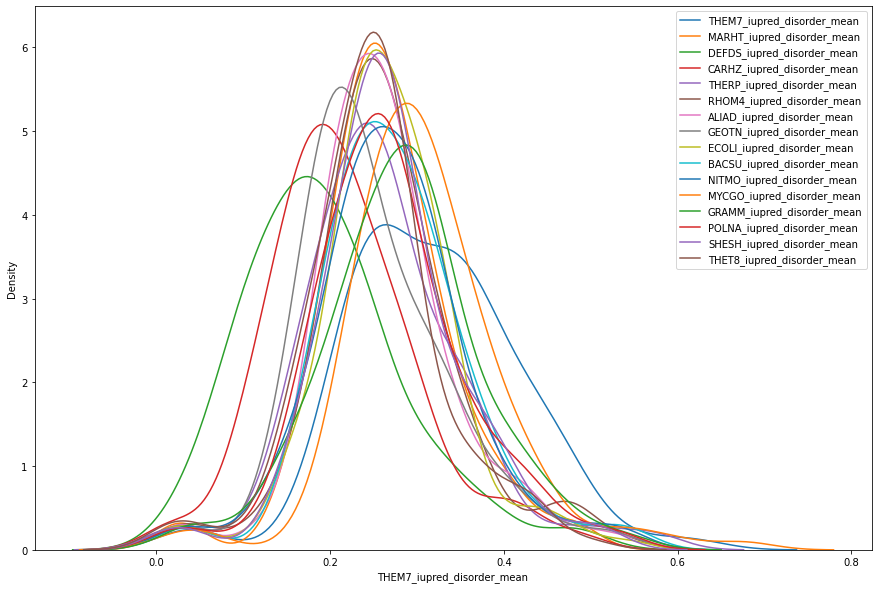

In [35]:
fig, ax = plt.subplots(figsize=(15,10))
for s in subset:
  sns.kdeplot(mean_disorders[s], label=s)
plt.legend()

In [36]:
final_df.to_pickle('/content/0.pkl')

In [50]:
mean_disorders

,THEM7_iupred_disorder_mean,MARHT_iupred_disorder_mean,DEFDS_iupred_disorder_mean,CARHZ_iupred_disorder_mean,THERP_iupred_disorder_mean,RHOM4_iupred_disorder_mean,ALIAD_iupred_disorder_mean,GEOTN_iupred_disorder_mean,ECOLI_iupred_disorder_mean,BACSU_iupred_disorder_mean,NITMO_iupred_disorder_mean,MYCGO_iupred_disorder_mean,GRAMM_iupred_disorder_mean,POLNA_iupred_disorder_mean,SHESH_iupred_disorder_mean,THET8_iupred_disorder_mean
0,0.249218,0.261836,0.183659,0.206630,0.229367,0.255472,0.269474,0.268141,0.278788,0.285249,0.262927,0.295903,0.300272,0.224248,0.285559,0.259374
1,0.229384,0.227734,0.071364,0.124788,0.215884,0.218949,0.181761,0.199406,0.226524,0.163593,0.222429,0.262919,0.270587,0.207971,0.254314,0.158902
2,0.242776,0.293863,0.098958,0.129259,0.162793,0.204173,0.195329,0.181062,0.211633,0.239210,0.192477,0.256979,0.183940,0.221143,0.223508,0.256614
3,0.238277,0.209088,0.155171,0.169000,0.208042,0.269696,0.221533,NaN,0.246147,0.262492,0.251377,0.291934,0.247337,0.204812,0.274408,0.213731
4,0.052587,0.024204,0.009107,0.008917,0.009991,0.029830,0.023676,0.013637,0.021478,0.018982,0.048145,0.014639,0.045732,0.022519,0.015745,0.006097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.198263,0.154288,0.054570,0.107811,0.167987,0.182084,0.118589,0.173652,0.160244,0.161742,0.153204,0.178934,0.221185,0.176335,0.203664,0.061434
125,0.394032,0.223072,0.115775,0.246763,0.262097,0.252800,0.284414,0.206703,0.291304,0.247986,0.285367,0.278456,0.233712,0.223704,0.250527,0.246538
126,0.251717,0.252443,0.213387,0.219892,0.219526,0.233796,0.256151,0.253932,0.293011,0.279016,0.233071,0.300879,0.231845,0.245981,0.267821,0.219694
127,0.363815,0.247120,0.119332,0.117291,0.210880,0.257860,0.203635,0.191759,0.246529,0.211634,0.206340,0.267208,0.263465,0.185761,0.226231,0.177935


,Code,Scientific Name,Common Name,Last Update,# of Sequences,NCBI TaxonId,D.,genus_and_species,taxonomy_id,strain,...,Genome_size,16S_accssion,16S_GC,Tmin,Topt_ave,Topt_low,Topt_high,Tmax,Tmax_Tmin,Expression
112,MARHT,Marinithermus hydrothermalis (strain DSM 1488...,NaN,2013-Dec-17,2194,869210,B,Marinithermus hydrothermalis,186192,T1,...,2.3,AB079382,64.0,50.0,67.5,NaN,NaN,72.5,22.5,NaN
132,THEM7,Thermaerobacter marianensis (strain ATCC 7008...,NaN,2012-Jan-19,2324,644966,B,Thermaerobacter marianensis,73919,7p75a,...,2.8,AB011495,64.0,50.0,75.0,74.0,76.0,80.0,30.0,NaN
136,DEFDS,Deferribacter desulfuricans (strain DSM 14783...,NaN,2010-Sep-29,2353,639282,B,Deferribacter desulfuricans,197162,BMA,...,2.5,AB086060,59.5,40.0,62.5,60.0,65.0,70.0,30.0,NaN
173,CARHZ,Carboxydothermus hydrogenoformans (strain ATC...,NaN,2014-Mar-24,2615,246194,B,Carboxydothermus hydrogenoformans,129958,Z-2901,...,2.4,NR_074395,58.8,40.0,71.0,70.0,72.0,78.0,38.0,NaN
214,THERP,Thermomicrobium roseum (strain ATCC 27502 / D...,NaN,2009-May-15,2858,309801,B,Thermomicrobium roseum,500,ATCC 27502,...,2.9,M34115,65.5,45.0,72.5,70.0,75.0,80.0,35.0,NaN
216,RHOM4,Rhodothermus marinus (strain ATCC 43812 / DSM...,NaN,2015-Mar-08,2861,518766,B,Rhodothermus marinus,29549,DSM 4252,...,3.4,NR_029282,61.9,54.0,65.0,NaN,NaN,77.0,23.0,NaN
234,ALIAD,Alicyclobacillus acidocaldarius subsp. acidoc...,NaN,2010-Jan-18,3059,521098,B,Alicyclobacillus acidocaldarius,405212,104-1A,...,3.2,AB042056,59.9,45.0,62.5,60.0,65.0,70.0,25.0,NaN
263,GEOTN,Geobacillus thermodenitrificans (strain NG80-2),NaN,2007-Jul-08,3419,420246,B,Geobacillus thermodenitrificans,33940,DSM 465,...,3.6,Z26928,58.4,45.0,57.5,50.0,65.0,70.0,25.0,NaN
325,BACSU,Bacillus subtilis (strain 168),NaN,2014-Mar-24,4254,224308,B,Bacillus subtilis,1423,ATCC 6051,...,NaN,AB042061,55.1,5.0,29.0,28.0,30.0,55.0,50.0,NaN
358,SHESH,Shewanella sediminis (strain HAW-EB3),NaN,2008-Mar-05,4493,425104,B,Shewanella sediminis,271097,HAW-EB3,...,5.5,AY579750,53.3,4.0,10.0,NaN,NaN,25.0,21.0,NaN


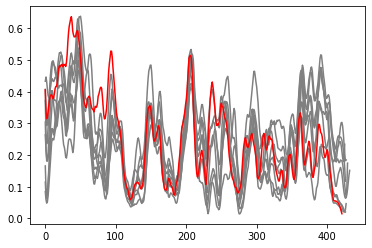

In [ ]:
n = 0

plt.plot(final_df.loc[n, 'THEM7_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'MARHT_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'DEFDS_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'CARHZ_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'THERP_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'RHOM4_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'ALIAD_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'GEOTN_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'TT_iupred_disorder'], c='red')

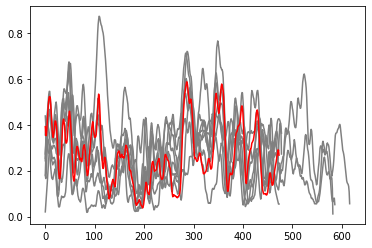

In [ ]:
n = 1

plt.plot(final_df.loc[n, 'THEM7_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'MARHT_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'DEFDS_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'CARHZ_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'THERP_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'RHOM4_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'ALIAD_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'GEOTN_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'TT_iupred_disorder'], c='red')

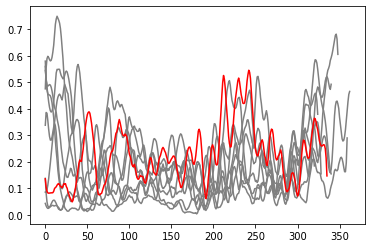

In [ ]:
n = 2

plt.plot(final_df.loc[n, 'THEM7_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'MARHT_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'DEFDS_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'CARHZ_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'THERP_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'RHOM4_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'ALIAD_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'GEOTN_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'TT_iupred_disorder'], c='red')

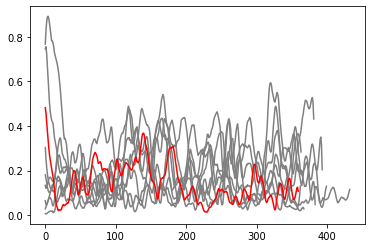

In [ ]:
n = 3

plt.plot(final_df.loc[n, 'THEM7_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'MARHT_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'DEFDS_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'CARHZ_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'THERP_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'RHOM4_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'ALIAD_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'GEOTN_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'TT_iupred_disorder'], c='red')

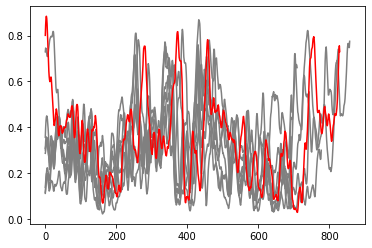

In [ ]:
n = 4

plt.plot(final_df.loc[n, 'THEM7_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'MARHT_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'DEFDS_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'CARHZ_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'THERP_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'RHOM4_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'ALIAD_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'GEOTN_iupred_disorder'], c='gray')
plt.plot(final_df.loc[n, 'TT_iupred_disorder'], c='red')

In [ ]:
#@title # Do you already have the disorder scores?

#@markdown Many of the packages are only required if
#@markdown you have to calculate the disorder scores.
#@markdown If you already have the scores, you should
#@markdown tick the box below, it will save time.

scores_calculated = False #@param {type: 'boolean'}

if scores_calculated == False:
  # connecting with API
  import urllib.request
  import json

  # install chromium, its driver, and selenium, set options
  !apt update
  !apt install chromium-chromedriver
  !pip install selenium
  from selenium import webdriver
  from selenium.webdriver.common.keys import Keys
  from selenium.webdriver.common.by import By
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')

# Biopython
!pip install BIO
from Bio import SeqIO, AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Align.Applications import ClustalwCommandline
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.SubsMat.MatrixInfo import blosum62
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils.ProtParamData import gravy_scales

# files uploading / downloading
from google.colab import files
import pickle
from io import StringIO

# statistics
!pip install --upgrade scipy
from scipy.stats import mannwhitneyu, chisquare, pearsonr, ttest_ind, ttest_rel, wilcoxon
from sklearn.preprocessing import MinMaxScaler

# other packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from tqdm.contrib import tzip
tqdm.pandas()

# install ClustalW
!sudo apt-get update
!sudo apt-get install clustalw

In [ ]:
def calculate_iupred(proteinID_list: list, score_only: bool=True) -> list:
  """Calculate protein IDR profile using IUPred3 REST API

  Creates URL based on protein UniProt accession numbers
  (from a list). Each IDR profile is saved as a JSON file
  and put into a list. The JSON files are then unpacked,
  either all data or only IUPred3 score are saved.

  Parameters
  ----------
  proteinID_list : list
    a list of protein accessions for which to predict IDR
  score_only : bool (default=True)
    whether the return should only contain IUPRed3 score.
    Other data are AA sequence, and a binary disorder
    prediction.

  Returns
  -------
  list
    a list of either IUPred3 scores or of all data from
    each JSON as a dictionary.

  """

  # make a list of URLs
  iupredURL_list = ['http://iupred3.elte.hu/iupred3/' + proteinID + '.json' \
                    for proteinID in proteinID_list]

  # download JSON files
  print('Retrieving disorder values from server...')
  protein_files = [try_retrieve_url(iupredURL, proteinID  + '.json')\
                   for iupredURL, proteinID in zip(tqdm(iupredURL_list),\
                                                        proteinID_list)]
  
  # empty list for unpacked JSON data
  proteins = []
  
  # populate the empty list
  print('Unpacking json files...')
  for proteinID in tqdm(proteinID_list):
    try:
      with open('/content/{}.json'.format(proteinID), 'r') as f:
        d = json.load(f)
        # check if only scores need to be saved
        if score_only == True:
          d = d['iupred2']
    except:
      d = np.nan
    proteins.append(d)
  
  return proteins

In [ ]:
def read_pickle_file(file_name: str):
  """A simple function to read pickle files

  Parameters
  ----------
  file_name : srt
    location of the pickle file
  
  Returns
  -------
  any format, but best with pd.DataFrames or lists
  
  """

  print(file_name + ' loading...')
  with open(file_name, 'rb') as f:
    result = pickle.load(f)
  print(file_name + ' loaded!')
  return result

In [ ]:
def get_pondr_calculations(protein_ID: str, sequence: str, return_df: bool=True):
  """Uses Selenium to scrape PONDR disorder
  calculations for a given protein

  Parameters
  ----------
  protein_ID : str
    protein ID or name. Required by PONDR,
    but has no effect on result
  sequence : str
    AA sequence of the protein
  return_df : bool
    whether return should be a DataFrame
    (True) or a tuple of lists (False). True
    by default
  
  Returns:
  --------
  DataFrame or tuple with lists

  """

  # set up web driver to get data from pondr.com
  wd = webdriver.Chrome(options=options)
  wd.get('http://www.pondr.com/')
  # set options and submit
  wd.find_element(By.NAME, 'ProteinName').send_keys(protein_ID)
  wd.find_element(By.NAME, 'Sequence').send_keys(sequence)
  wd.find_element(By.NAME, 'VL3').click()
  wd.find_element(By.NAME, 'VSL2').click()
  wd.find_element(By.NAME, 'wcwraw').click()
  wd.find_element(By.NAME, 'submit_result').click()
  # paste the raw results table to a DataFrame
  try:
    table = wd.find_elements(By.TAG_NAME, 'pre')[-1]
    table_text = table.text
    disorder_df = pd.read_csv(StringIO(table_text.replace('  ', ' ')), sep=' ')[['VLXT', 'VL3', 'VSL2']]
  except:
    disorder_df = pd.DataFrame(columns=['VLXT', 'VL3', 'VSL2'])
  if return_df == True:
    return disorder_df
  else:
    return [*disorder_df['VLXT']], [*disorder_df['VL3']], [*disorder_df['VSL2']]

In [ ]:
def fix_neg_inf(df: pd.DataFrame, replacement=np.nan) -> pd.DataFrame:
  """Replaces -inf values in a given dataframe

  Parameters
  ----------
  df : pd.DataFrame
    The dataframe with -inf to be replaced
  replacement
    The value to replace -inf with. Default
    is np.nan
  
  Returns:
  --------
  pd.DataFrame

  """

  df_new = df.copy()
  df_new[df.astype(float) < 0] = replacement
  return df_new